In [2]:
%matplotlib notebook

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from datetime import date, timedelta

In [4]:
movies_df = pd.read_csv("../output_data/clean_data_for_analysis.csv")
movies_df.head()

,Title,Type,Release,Runtime,Genre,Nominations,Metascore,imdbRating,imdbVotes,imdbID,Budget,Gross,Platform
0,Insidious: The Last Key,Movie,2018-01-05,6180.0,Horror,NaN,49.0,5.7,63102,tt5726086,10000000.0,167885588.0,others
1,Stratton,Movie,2018-01-05,5700.0,Action,NaN,26.0,4.8,5405,tt3567666,NaN,257212.0,others
2,Sweet Country,Movie,2018-04-06,6780.0,Adventure,NaN,88.0,6.9,8855,tt6958212,NaN,1849718.0,others
3,The Commuter,Movie,2018-01-12,6240.0,Action,NaN,56.0,6.3,118954,tt1590193,30000000.0,119942387.0,others
4,Freak Show,Movie,2018-01-12,5460.0,Comedy,NaN,54.0,6.5,4376,tt5089534,NaN,20657.0,others


In [5]:
movies_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1153 entries, 0 to 1152
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Title        1153 non-null   object 
 1   Type         1153 non-null   object 
 2   Release      1153 non-null   object 
 3   Runtime      1153 non-null   float64
 4   Genre        1153 non-null   object 
 5   Nominations  167 non-null    float64
 6   Metascore    1053 non-null   float64
 7   imdbRating   1153 non-null   float64
 8   imdbVotes    1153 non-null   int64  
 9   imdbID       1153 non-null   object 
 10  Budget       500 non-null    float64
 11  Gross        837 non-null    float64
 12  Platform     1153 non-null   object 
dtypes: float64(6), int64(1), object(6)
memory usage: 117.2+ KB


In [6]:
movies_df['Platform'].unique()

array(['others', 'netflix', 'amazon', 'hulu', 'disney'], dtype=object)

In [7]:
#change Release type to date
movies_df['Release'] = pd.to_datetime(movies_df['Release'])

In [8]:
covid = date(2020, 1, 1)
print(covid)

2020-01-01


In [9]:
#clean movies to only keep Title Genre Release Gross Platform
clean_movies_df = movies_df[['Title', 'Release', 'Genre', 'Gross', 'Platform']]
clean_movies_df.head()

,Title,Release,Genre,Gross,Platform
0,Insidious: The Last Key,2018-01-05,Horror,167885588.0,others
1,Stratton,2018-01-05,Action,257212.0,others
2,Sweet Country,2018-04-06,Adventure,1849718.0,others
3,The Commuter,2018-01-12,Action,119942387.0,others
4,Freak Show,2018-01-12,Comedy,20657.0,others


In [10]:
#seperate box office movies from all
boxoffice_df = clean_movies_df.loc[(clean_movies_df["Gross"].notnull())]
boxoffice_df.head()

,Title,Release,Genre,Gross,Platform
0,Insidious: The Last Key,2018-01-05,Horror,167885588.0,others
1,Stratton,2018-01-05,Action,257212.0,others
2,Sweet Country,2018-04-06,Adventure,1849718.0,others
3,The Commuter,2018-01-12,Action,119942387.0,others
4,Freak Show,2018-01-12,Comedy,20657.0,others


In [11]:
#seperate netflix movies from all
netflix_df = clean_movies_df.loc[clean_movies_df['Platform'] == "netflix"]
netflix_df.head()

,Title,Release,Genre,Gross,Platform
16,The Cloverfield Paradox,2018-02-04,Action,NaN,netflix
126,Extinction,2018-07-27,Action,1451864.0,netflix
190,The Ballad of Buster Scruggs,2018-11-09,Comedy,NaN,netflix
197,Roma,2018-12-14,Drama,1140769.0,netflix
199,Mowgli: Legend of the Jungle,2018-12-07,Adventure,NaN,netflix


In [24]:
#do pre & post for both boxoffice
pre_boxoffice_df = boxoffice_df.loc[clean_movies_df['Release'] < '2020-01-01']
post_boxoffice_df = boxoffice_df.loc[clean_movies_df['Release'] >= '2020-01-01']
#do pre & post for both netflix
pre_netflix_df = netflix_df.loc[clean_movies_df['Release'] < '2020-01-01']
post_netflix_df = netflix_df.loc[clean_movies_df['Release'] >= '2020-01-01']

In [25]:
pre_boxoffice_df

,Title,Release,Genre,Gross,Platform
0,Insidious: The Last Key,2018-01-05,Horror,167885588.0,others
1,Stratton,2018-01-05,Action,257212.0,others
2,Sweet Country,2018-04-06,Adventure,1849718.0,others
3,The Commuter,2018-01-12,Action,119942387.0,others
4,Freak Show,2018-01-12,Comedy,20657.0,others
...,...,...,...,...,...
403,Cats,2019-12-20,Comedy,75558925.0,others
404,Spies in Disguise,2019-12-25,Animation,171616764.0,others
405,Little Women,2019-12-25,Drama,218843645.0,others
575,The Informer,2019-08-30,Action,2927708.0,others


In [26]:
pre_box_genre_counts = pre_boxoffice_df['Genre'].value_counts()
pre_box_genre_counts

Action         100
Comedy          68
Drama           67
Biography       49
Adventure       24
Animation       19
Crime           16
Horror          12
Documentary      3
Thriller         1
Sci-Fi           1
Fantasy          1
Name: Genre, dtype: int64

In [27]:
post_box_counts = post_boxoffice_df['Genre'].value_counts()
post_box_counts

Drama          122
Action         117
Comedy          78
Biography       40
Animation       29
Horror          25
Crime           24
Documentary     13
Adventure       10
Thriller         8
Fantasy          4
Mystery          3
Music            1
History          1
Family           1
Name: Genre, dtype: int64

In [28]:
post_netflix_counts = post_netflix_df['Genre'].value_counts()
post_netflix_counts

Comedy       36
Drama        28
Action       25
Animation    10
Crime         7
Biography     6
Adventure     3
Thriller      2
Family        2
Horror        1
Name: Genre, dtype: int64

In [29]:
pre_netflix_counts = pre_netflix_df['Genre'].value_counts()
pre_netflix_counts

Comedy       8
Action       7
Biography    6
Drama        5
Horror       2
Thriller     1
Animation    1
Adventure    1
Name: Genre, dtype: int64

<IPython.core.display.Javascript object>


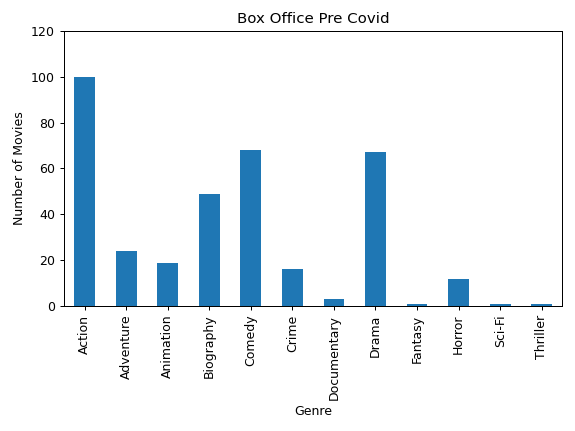

In [35]:
pre_groups = pre_boxoffice_df.groupby('Genre')
pre_box_grps = pre_groups['Genre'].count()
pre_box_chart = pre_box_grps.plot(kind='bar', title='Box Office Pre Covid')
pre_box_chart.set_ylabel("Number of Movies")
pre_box_chart.set_ylim([0,120])
plt.show()
plt.tight_layout()

<IPython.core.display.Javascript object>


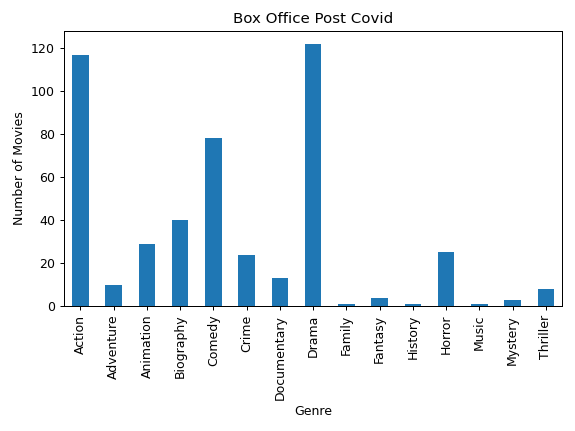

In [31]:
post_groups = post_boxoffice_df.groupby('Genre')
post_box_grps = post_groups['Genre'].count()
post_box_chart = post_box_grps.plot(kind='bar', title='Box Office Post Covid')
post_box_chart.set_ylabel("Number of Movies")
plt.show()
plt.tight_layout()

<IPython.core.display.Javascript object>


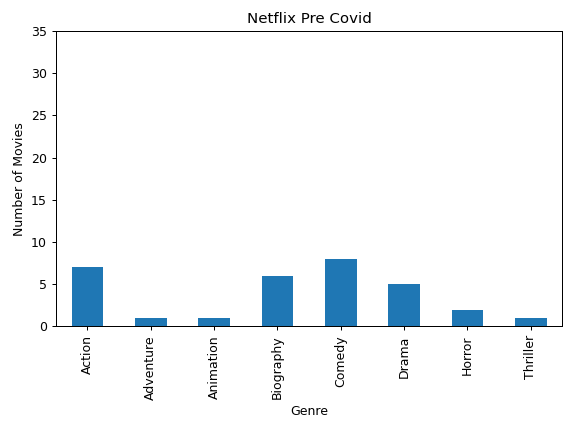

In [33]:
pre_ngroups = pre_netflix_df.groupby('Genre')
pre_netflix_grps = pre_ngroups['Genre'].count()
pre_netflix_chart = pre_netflix_grps.plot(kind='bar', title='Netflix Pre Covid')
pre_netflix_chart.set_ylabel("Number of Movies")
pre_netflix_chart.set_ylim([0,35])
plt.show()
plt.tight_layout()

<IPython.core.display.Javascript object>


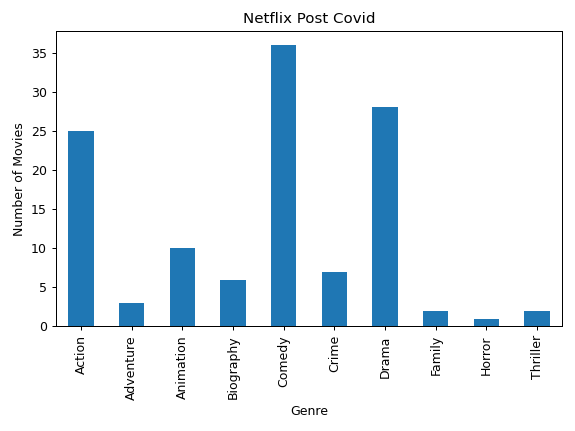

In [34]:
post_ngroups = post_netflix_df.groupby('Genre')
post_netflix_grps = post_ngroups['Genre'].count()
post_netflix_chart = post_netflix_grps.plot(kind='bar', title='Netflix Post Covid')
post_netflix_chart.set_ylabel("Number of Movies")
plt.show()
plt.tight_layout()